#### Carrega as variaveis de ambiente para executar o notebook

In [1]:
%load_ext dotenv
%dotenv
%matplotlib inline

In [35]:
import os
import pandas as pd
from data_preparation import PreProcess
from sklearn.preprocessing import MinMaxScaler


raw_file_path = os.environ.get("RAW_DATA_PATH")
data_file_path = os.environ.get("DATASET_PATH")
model_base_path = os.environ.get("MODELS_PATH")
columns_to_pop = ['ticker', 'dt_price']

path_content = os.listdir(raw_file_path)
# Filtra os arquivos parquet do diretório
path_content = [file for file in path_content if file.endswith(".parquet")]
pre_process = PreProcess()

for file in path_content:
    df_raw = pd.read_parquet(os.path.join(raw_file_path, file))
    df_raw.set_index("dt_price", drop=False, inplace=True)

    # Calcula os indicadores técnicos definidos nas estratégias para cada ativo
    for strategy_name, strategy, df_tech in pre_process.calculate_strategy("strategies.json", df_raw):
        window_size = strategy["historic_period"]
        stride = strategy["stride"]
        profit_period = strategy["profit_period"]
        profit = strategy["profit"]
        scaler = MinMaxScaler()
        
        df_aux = pd.DataFrame()
        for col in columns_to_pop:
            df_aux[col] = df_tech.pop(col)

        df_aux.reset_index(inplace=True, drop=True)

        # Remove os valores nulos do DataFrame
        df_tech.dropna(inplace=True)
        transformed = scaler.fit_transform(df_tech)
        df_tech = pd.concat([df_aux, pd.DataFrame(transformed, columns=scaler.get_feature_names_out())], axis=1)

    break


Processing strategy: Bolinger Bands 21 dias, MACD (12, 26, 9) e AD
Calculating BBANDS_14...
Calculating DEMA_21...
Calculating HT_TRENDLINE...
Calculating KAMA_21...
Calculating MIDPRICE...
Calculating SAR...
Calculating SMA_21...
Calculating T3_21...
Calculating TRIMA_21...
Calculating WMA_21...
Calculating MACD...
Calculating AD...
Calculating NATR...
Calculating RSI...
Calculating WILLR...


/var/folders/w2/_k7008qj40z1v48dtc4x01jr0000gn/T/ipykernel_91614/1713463386.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_tech.corr()


<AxesSubplot: >

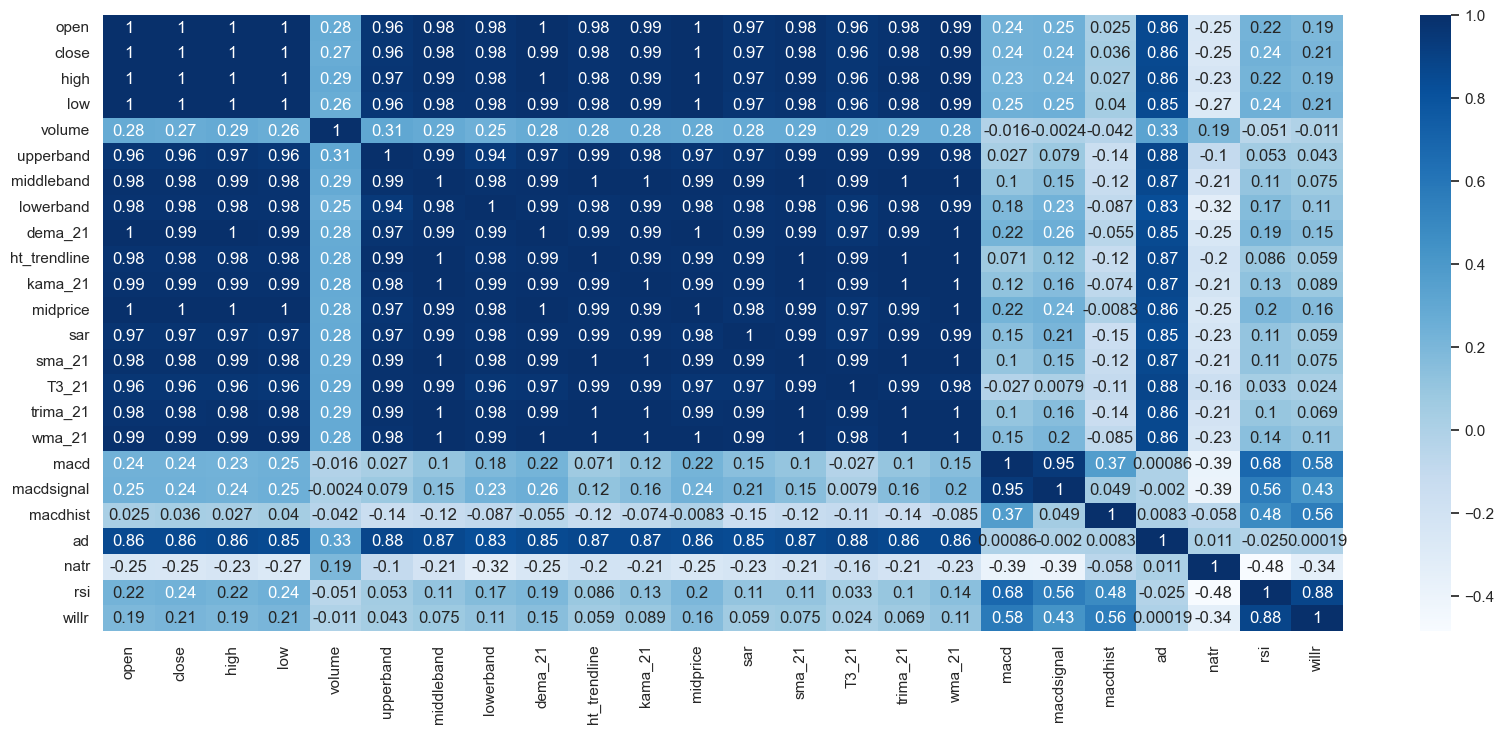

In [36]:
import seaborn as sb
corr = df_tech.corr()

sb.set(rc={'figure.figsize':(20.0,8.0)})
sb.heatmap(corr, cmap="Blues", annot=True)


In [20]:
df_tech.head(20)

,ticker,dt_price,open,close,high,low,volume,upperband,middleband,lowerband,macd,macdsignal,macdhist,ad,natr,rsi,willr
0,CPFE3,2012-09-03,0.239985,0.239635,0.238491,0.235959,0.017010,0.177828,0.211621,0.236960,0.732578,0.681834,0.672494,0.005557,0.265096,0.670065,0.830986
1,CPFE3,2012-09-04,0.233560,0.244960,0.237736,0.246880,0.010436,0.180661,0.212905,0.236231,0.738303,0.689797,0.670151,0.006668,0.260244,0.690332,0.929577
2,CPFE3,2012-09-05,0.248299,0.241917,0.240000,0.249220,0.013306,0.182529,0.213780,0.235806,0.741092,0.696831,0.662603,0.006759,0.258862,0.672308,0.861111
3,CPFE3,2012-09-06,0.237717,0.246862,0.237358,0.251170,0.004896,0.185144,0.215005,0.235212,0.745151,0.703423,0.659017,0.007620,0.251251,0.692602,0.951389
4,CPFE3,2012-09-10,0.234694,0.244580,0.240755,0.251560,0.024063,0.186474,0.215550,0.234755,0.746899,0.709113,0.651683,0.008306,0.248863,0.677842,0.897260
5,CPFE3,2012-09-11,0.246032,0.248764,0.241132,0.251560,0.006294,0.189020,0.216794,0.234279,0.749732,0.714339,0.647914,0.009077,0.244456,0.696379,0.965986
6,CPFE3,2012-09-12,0.248299,0.248003,0.241132,0.254680,0.004579,0.191205,0.218817,0.235755,0.751154,0.718858,0.642171,0.009527,0.239906,0.690907,0.952381
7,CPFE3,2012-09-13,0.246788,0.246482,0.239245,0.253900,0.021022,0.192919,0.220664,0.237427,0.751112,0.722463,0.634746,0.011173,0.235047,0.679397,0.925170
8,CPFE3,2012-09-14,0.249433,0.255610,0.249057,0.258580,0.020483,0.195697,0.222901,0.238643,0.754724,0.726207,0.635869,0.012914,0.230407,0.723972,0.952381
9,CPFE3,2012-09-17,0.243386,0.234690,0.241132,0.240250,0.024084,0.195674,0.224223,0.241280,0.747609,0.727509,0.616037,0.012146,0.247218,0.582585,0.625000
